In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Load the dataset into python environment

In [2]:
ds=pd.read_csv(r"C:\Users\sreer\Downloads\titanic_dataset.csv")

In [3]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column

In [4]:
ds=ds.set_index(['PassengerId'])


In [5]:
ds.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [6]:
ds.shape

(891, 11)

In [7]:
ds.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
ds.duplicated()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Length: 891, dtype: bool

In [9]:
ds.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
ds.columns.unique()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


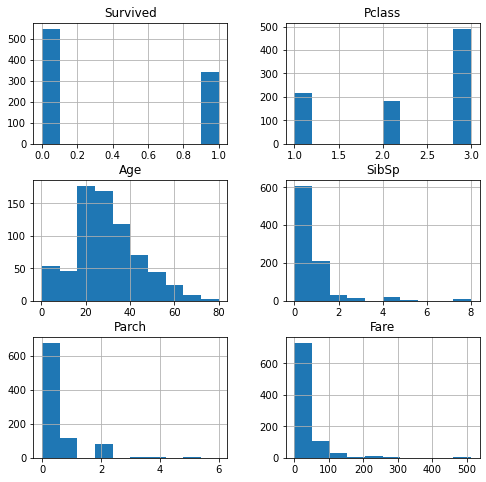

In [12]:
freq_graph=ds.select_dtypes(include=['float','int64'])
freq_graph.hist(figsize=(8,8))
plt.show()

### 4. Fill in all the missing values present in all the columns in the dataset 

In [13]:
ds['Age']=ds['Age'].fillna(ds['Age'].median())
ds['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    28.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
import statistics
for x in ['Embarked']:
    ds[x]=ds[x].replace(np.NaN,statistics.mode(ds[x]))
ds['Embarked']    

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [15]:
ds['Cabin']=ds['Cabin'].fillna(method='bfill')
ds['Cabin']

PassengerId
1       C85
2       C85
3      C123
4      C123
5       E46
       ... 
887     B42
888     B42
889    C148
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

## Dropping unwanted columns 

In [16]:
ds.drop('Name',axis=1,inplace=True)
ds.drop('Cabin',axis=1,inplace=True)
ds.drop('Ticket',axis=1,inplace=True)
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## 5. Check and handle outliers in at least 3 columns in the dataset

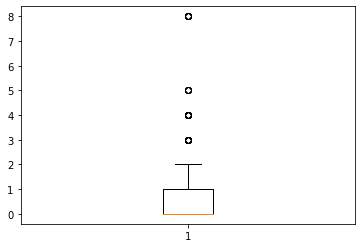

In [17]:
plt.boxplot(ds['SibSp'])
plt.show()

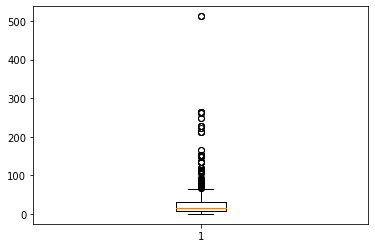

In [18]:
plt.boxplot(ds['Fare'])
plt.show()

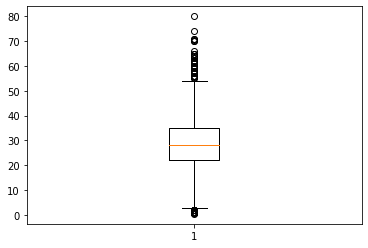

In [19]:
plt.boxplot(ds['Age'])
plt.show()

## Handling outliers of Age,Fare,Sibsp

In [20]:
q1_sib=np.percentile(ds['SibSp'],25,interpolation='midpoint')
q3_sib=np.percentile(ds['SibSp'],75,interpolation='midpoint')
print("q1 sibling",q1_sib)
print("q3_sibling",q3_sib)

IQR=q3_sib-q1_sib
print("IQR",IQR)

lower_limit_sib=q1_sib-1.5*IQR
upper_limit_sib=q3_sib+1.5*IQR
print("lower limit",lower_limit_sib)
print("upper limit",upper_limit_sib)

q1 sibling 0.0
q3_sibling 1.0
IQR 1.0
lower limit -1.5
upper limit 2.5


In [21]:
index_sib=ds['SibSp'][(ds['SibSp']>upper_limit_sib)|(ds['SibSp']<lower_limit_sib)].index 
print(index_sib)
ds.drop(index_sib,inplace=True)

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')


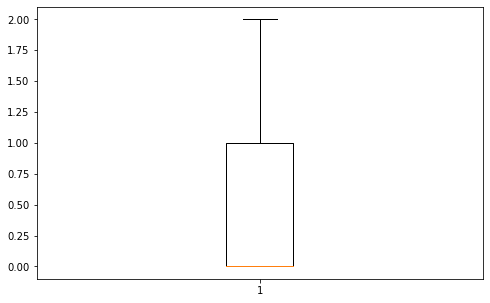

In [22]:
plt.figure(figsize=(8,5))
plt.boxplot(ds['SibSp'])
plt.show()

In [23]:
q1_age=np.percentile(ds['Age'],25,interpolation='midpoint')
q3_age=np.percentile(ds['Age'],75,interpolation='midpoint')

print("Q1 age",q1_age)

print("Q3 age",q3_age)

IQR=q3_age-q1_age
print("IQR",IQR)

lower_limit_age=q1_age-1.5*IQR
upper_limit_age=q3_age+1.5*IQR

print("lower_limit",lower_limit_age)
print('upper limit',upper_limit_age)

Q1 age 23.0
Q3 age 36.0
IQR 13.0
lower_limit 3.5
upper limit 55.5


In [24]:
index_age=ds['Age'][(ds['Age']>upper_limit_age )|(ds['Age']<lower_limit_age)].index
print(index_age)
ds.drop(index_age,inplace=True)

Int64Index([ 12,  34,  44,  55,  79,  95,  97, 117, 171, 173, 175, 184, 194,
            196, 206, 233, 253, 269, 276, 281, 298, 306, 327, 341, 349, 367,
            382, 408, 439, 457, 468, 470, 480, 484, 488, 494, 531, 546, 556,
            571, 588, 626, 627, 631, 645, 648, 660, 673, 685, 695, 746, 756,
            773, 789, 804, 828, 830, 832, 852, 880],
           dtype='int64', name='PassengerId')


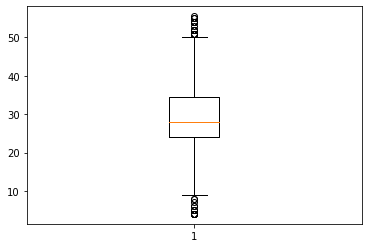

In [25]:
plt.boxplot(ds['Age'])
plt.show()

In [26]:
q1_fare=np.percentile(ds['Fare'],25,interpolation='midpoint')
q3_fare=np.percentile(ds['Fare'],75,interpolation='midpoint')
print("Q1 quartile ",q1_fare)
print("Q3 quartile",q3_fare)
IQR=q3_fare-q1_fare
print(IQR)
lower_limit_fare=q1_fare-1.5*IQR
upper_limit_fare=q3_fare+1.5*IQR
print(lower_limit_fare)
print(upper_limit_fare)

Q1 quartile  7.8958
Q3 quartile 27.75
19.8542
-21.885499999999997
57.5313


In [27]:
index=ds['Fare'][(ds['Fare']>upper_limit_fare) | (ds['Fare']<lower_limit_fare)].index
print(index)
ds.drop(index,inplace=True)

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)


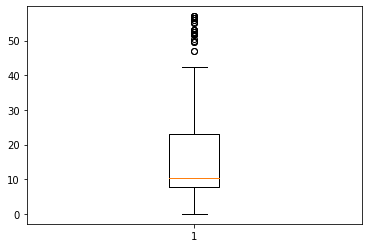

In [28]:
plt.boxplot(ds['Fare'])
plt.show()

<AxesSubplot:xlabel='Survived'>

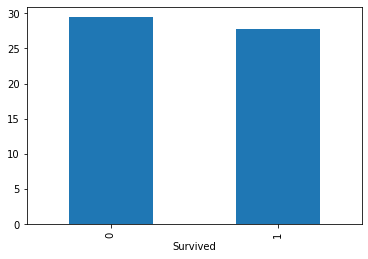

In [29]:
ds.groupby('Survived')['Age'].mean().plot(kind='bar')

### Majority of the people died 

<AxesSubplot:xlabel='Sex'>

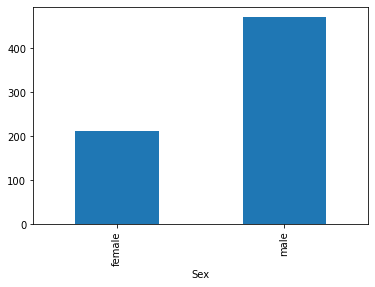

In [30]:
ds.groupby('Sex')['Age'].count().plot(kind='bar')

### Males were more than females 

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

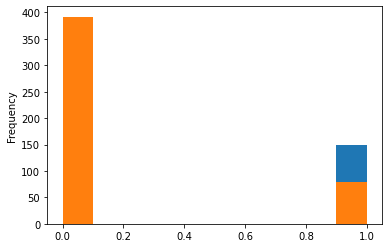

In [31]:
ds.groupby('Sex')['Survived'].plot(kind='hist')

### Mortality rate of males were more compared to females 

## Encoding the categorical values 

In [32]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q


In [33]:
cate_values=[]
values=['Pclass','Sex','Embarked']
for i in values:
    cate_values.append(pd.get_dummies(ds[i]))


In [34]:
dummy=pd.concat(cate_values,axis=1)

In [35]:
ds=pd.concat((ds,dummy),axis=1)


In [36]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
PassengerId,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1
6,0,3,male,28.0,0,0,8.4583,Q,0,0,1,0,1,0,1,0


In [37]:
new_ds=ds.drop(['Pclass','Sex','Embarked'],axis=1)

In [38]:
new_ds.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
6,0,28.0,0,0,8.4583,0,0,1,0,1,0,1,0


<AxesSubplot:>

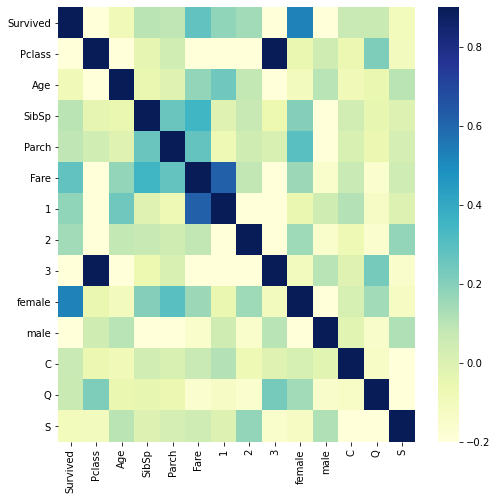

In [39]:
corr_matrix=ds.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,cmap='YlGnBu')

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
y=new_ds['Survived']
X=new_ds.drop(['Survived','female'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.25)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print("Before scaling")
print("MSE is",mean_squared_error(y_test,prediction))
print("R squared is",r2_score(y_test,prediction))


Before scaling
MSE is 0.16716533471048003
R squared is 0.22632454063482954


## 6.Do min max scaling on the feature set (Take ‘Survived’ as target

In [41]:
from sklearn import preprocessing
scale=new_ds.drop(['Survived',1,2,3,'female','male','C','Q','S'],axis=1)
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
scale=min_max.fit_transform(scale)
scale=pd.DataFrame(scale)
scale.columns=['Age','SibSp','Parch','Fare']

print(scale.head())
scale.describe()

        Age  SibSp  Parch      Fare
0  0.349515    0.5    0.0  0.127193
1  0.427184    0.0    0.0  0.139035
2  0.601942    0.5    0.0  0.931579
3  0.601942    0.0    0.0  0.141228
4  0.466019    0.0    0.0  0.148391


,Age,SibSp,Parch,Fare
count,683.000000,683.000000,683.000000,683.000000
mean,0.483091,0.133236,0.043436,0.285462
std,0.182568,0.249267,0.125323,0.220937
min,0.000000,0.000000,0.000000,0.000000
25%,0.388350,0.000000,0.000000,0.137793
50%,0.466019,0.000000,0.000000,0.184211
75%,0.563107,0.000000,0.000000,0.403509
max,1.000000,1.000000,1.000000,1.000000


In [42]:
X=scale.values
print(X)

[[0.34951456 0.5        0.         0.12719298]
 [0.42718447 0.         0.         0.13903509]
 [0.60194175 0.5        0.         0.93157895]
 ...
 [0.46601942 0.5        0.33333333 0.41140351]
 [0.42718447 0.         0.         0.52631579]
 [0.54368932 0.         0.         0.13596491]]


In [43]:

y=new_ds['Survived'].values

print(y)

[0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 0 

In [48]:


X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.25)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print("After scaling")
print("MSE is",mean_squared_error(y_test,prediction))
print("R squared is",r2_score(y_test,prediction))


After scaling
MSE is 0.16716533471048003
R squared is 0.22632454063482954
